# Neural Network

In [169]:
pip install funcsigs

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import auc,roc_curve,average_precision_score, f1_score, precision_score, recall_score, balanced_accuracy_score, roc_auc_score, confusion_matrix,accuracy_score

In [3]:
X_train = np.load("/Users/alex/Desktop/X_train_freq.npy")
X_test =np.load("/Users/alex/Desktop/X_test_freq.npy")
y_train =np.load("/Users/alex/Desktop/y_train.npy")
y_test  =np.load("/Users/alex/Desktop/y_test.npy")

## Plot Function

In [171]:
import matplotlib.pyplot as plt
import itertools
import matplotlib
import numpy as np
from sklearn.metrics import precision_recall_curve
from funcsigs import signature

In [164]:
# Confusion matrix
def plot_confusion_matrix(cm, classes, normalize=False,title='Confusion matrix', cmap=plt.cm.Blues):

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.imshow(cm, interpolation='nearest', cmap=cmap) 
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes)) 
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.

    for i, j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),horizontalalignment="center", fontsize=16, color="white" if cm[i, j] > thresh else "black")

    
    plt.ylabel('True label') 
    plt.xlabel('Predicted label') 
    plt.tight_layout()
    

In [ ]:
# Call Function with
cmte = confusion_matrix(y_test, y_test_pred)
np.set_printoptions(precision=2)
class_names = ['no', 'yes']
plt.figure()
plot_confusion_matrix(cmte, classes=class_names,title='Confusion matrix Neural Network Test')

cmtr = confusion_matrix(y_train, y_train_pred)
np.set_printoptions(precision=2)
class_names = ['no', 'yes']
plt.figure()
plot_confusion_matrix(cmtr, classes=class_names,title='Confusion matrix Neural Network Train')

In [205]:
# ROC_AUC
def plot_roc_auc_curve(method,X_test,y_test, y_test_pred):
    y_probs = method.predict_proba(X_test)
    fpr, tpr, threshold = roc_curve(y_test, y_probs[:, 1])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc) 
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.title('ROC Curve of Neural Network')
    plt.show()

In [ ]:
# Call Function with
plot_roc_auc_curve(method,X_test,y_test, y_test_pred)

In [ ]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
import matplotlib.pyplot as plt

#P_R Curve

def plot_precision_recall_curve(method,X_test,y_test, y_test_pred):
    average_precision = average_precision_score(y_test, y_test_pred)
    disp = plot_precision_recall_curve(method, X_test, y_test)
    disp.ax_.set_title('2-class Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision))

In [198]:
def report_scores(y_test, y_test_pred):
    
    f1 = f1_score(y_test, y_test_pred)
    accuracy= accuracy_score(y_test, y_test_pred)
    precision = precision_score(y_test, y_test_pred)
    recall = recall_score(y_test, y_test_pred)
    auc = roc_auc_score(y_test, y_test_pred)
    average_precision = average_precision_score(y_test, y_test_pred)
    
    return f1,accuracy,precision,recall,auc,average_precision
    

In [201]:
report = pd.DataFrame(columns=['Model','Scores','Train','Validation','Test'])
report['Scores'] = ['F1','Accuracy','Precision', 'Recall','AUC','Averaged_Precision']

## Train/Test

In [178]:
mlp=MLPClassifier(solver ="adam",random_state=42,max_iter=1000)
mlp.fit(X_train, y_train)
y_train_pred = mlp.predict(X_train)
y_test_pred = mlp.predict(X_test)

In [194]:
y_scores = mlp.predict_proba(X_test)
y_scores 

array([[0.91, 0.09],
       [0.62, 0.38],
       [0.22, 0.78],
       ...,
       [0.51, 0.49],
       [0.98, 0.02],
       [0.98, 0.02]])

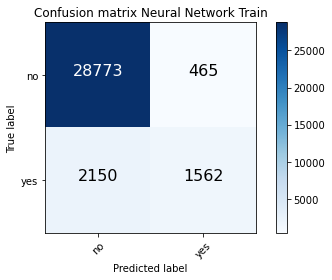

In [179]:
cmtr = confusion_matrix(y_train, y_train_pred)
np.set_printoptions(precision=2)
class_names = ['no', 'yes']
plt.figure()
plot_confusion_matrix(cmtr, classes=class_names,title='Confusion matrix Neural Network Train')

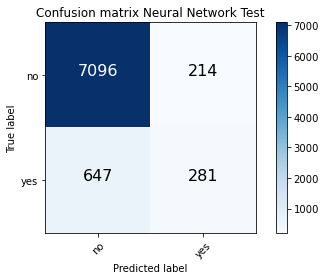

In [180]:
cmte = confusion_matrix(y_test, y_test_pred)
np.set_printoptions(precision=2)
class_names = ['no', 'yes']
plt.figure()
plot_confusion_matrix(cmte, classes=class_names,title='Confusion matrix Neural Network Test')

Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.25')

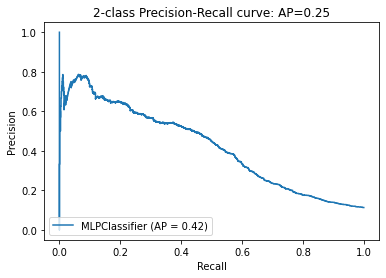

In [196]:
average_precision = average_precision_score(y_test, y_test_pred)
disp = plot_precision_recall_curve(mlp, X_test, y_test)
disp.ax_.set_title('2-class Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision))

In [199]:
report_scores(y_test, y_test_pred)

(0.39494026704146173,
 0.8954843408594318,
 0.5676767676767677,
 0.30280172413793105,
 0.6367633791688287,
 0.2504319842192171)

## GridSearchCV 

In [92]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

In [55]:
X_train = np.load("/Users/alex/Desktop/X_train_freq.npy")
X_test =np.load("/Users/alex/Desktop/X_test_freq.npy")
y_train =np.load("/Users/alex/Desktop/y_train.npy")
y_test  =np.load("/Users/alex/Desktop/y_test.npy")

### Adam

In [149]:
mlp=MLPClassifier(solver ="adam",random_state=42,max_iter=1000)


scoring = {'AUC': 'roc_auc', 
           'Accuracy': make_scorer(accuracy_score),
           'Average_Precision':make_scorer(average_precision_score)
           }

param_grid ={
    'learning_rate':["constant","invscaling","adaptive"],
    'hidden_layer_sizes':[(1,5),(2,5),(3,5)],
    'alpha':[0.0,0.0001,0.001,0.01],
    'activation' :["logistic","relu","tanh"] }

CV_nnmodel = GridSearchCV(estimator=mlp,
                          param_grid=param_grid,
                          scoring = scoring,
                          return_train_score=True,
                          refit = 'AUC',
                          cv =3,
                          n_jobs=-1) 
       
CV_nnmodel.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=MLPClassifier(max_iter=1000, random_state=42),
             n_jobs=-1,
             param_grid={'activation': ['logistic', 'relu', 'tanh'],
                         'alpha': [0.0, 0.0001, 0.001, 0.01],
                         'hidden_layer_sizes': [(1, 5), (2, 5), (3, 5)],
                         'learning_rate': ['constant', 'invscaling',
                                           'adaptive']},
             refit='AUC', return_train_score=True,
             scoring={'AUC': 'roc_auc', 'Accuracy': make_scorer(accuracy_score),
                      'Average_Precision': make_scorer(average_precision_score)})

In [151]:
parameters = CV_nnmodel.best_params_
parameters

{'activation': 'relu',
 'alpha': 0.001,
 'hidden_layer_sizes': (3, 5),
 'learning_rate': 'constant'}

In [152]:
scores =CV_nnmodel.best_score_
scores

0.7827670980051805

In [211]:
report1 = pd.DataFrame(CV_nnmodel.cv_results_)
report1[['param_learning_rate','param_hidden_layer_sizes','param_alpha','param_activation','mean_train_AUC','mean_test_AUC','mean_train_Accuracy','mean_test_Accuracy','mean_train_Average_Precision','mean_test_Average_Precision']]

,param_learning_rate,param_hidden_layer_sizes,param_alpha,param_activation,mean_train_AUC,mean_test_AUC,mean_train_Accuracy,mean_test_Accuracy,mean_train_Average_Precision,mean_test_Average_Precision
0,constant,"(1, 5)",0,logistic,0.773249,0.771836,0.891184,0.889287,0.157237,0.149720
1,invscaling,"(1, 5)",0,logistic,0.773249,0.771836,0.891184,0.889287,0.157237,0.149720
2,adaptive,"(1, 5)",0,logistic,0.773249,0.771836,0.891184,0.889287,0.157237,0.149720
3,constant,"(2, 5)",0,logistic,0.773164,0.771100,0.897527,0.896540,0.248612,0.245210
4,invscaling,"(2, 5)",0,logistic,0.773164,0.771100,0.897527,0.896540,0.248612,0.245210
...,...,...,...,...,...,...,...,...,...,...
103,invscaling,"(2, 5)",0.01,tanh,0.784445,0.781082,0.899848,0.897663,0.246625,0.235539
104,adaptive,"(2, 5)",0.01,tanh,0.784445,0.781082,0.899848,0.897663,0.246625,0.235539
105,constant,"(3, 5)",0.01,tanh,0.787808,0.774968,0.900592,0.898604,0.247034,0.236945
106,invscaling,"(3, 5)",0.01,tanh,0.787808,0.774968,0.900592,0.898604,0.247034,0.236945


In [218]:
report1[report1['mean_test_AUC'].isin([0.7827670980051805])][['mean_test_AUC','mean_test_Accuracy','mean_test_Average_Precision']]

,mean_test_AUC,mean_test_Accuracy,mean_test_Average_Precision
60,0.782767,0.898786,0.234657
61,0.782767,0.898786,0.234657
62,0.782767,0.898786,0.234657


In [161]:
# Test the Trained Model on Test Set
mlp_adam=MLPClassifier(solver="adam",
                       random_state=42,
                       activation = 'relu',
                       alpha = 0.01,
                       hidden_layer_sizes = (3,5),
                       learning_rate = 'constant')
mlp_adam.fit(X_train,y_train)
y_train_pred_2 = mlp_adam.predict(X_train)
y_test_pred_2 = mlp_adam.predict(X_test)

### Plot Adam

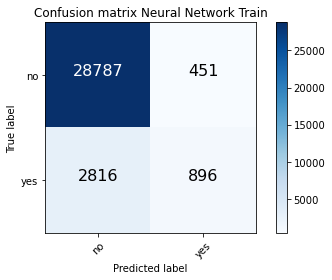

In [202]:
cmtr = confusion_matrix(y_train, y_train_pred_2)
np.set_printoptions(precision=2)
class_names = ['no', 'yes']
plt.figure()
plot_confusion_matrix(cmtr, classes=class_names,title='Confusion matrix Neural Network Train')

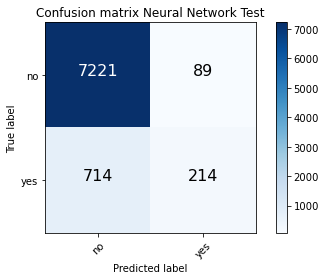

In [203]:
cmte = confusion_matrix(y_test, y_test_pred_2)
np.set_printoptions(precision=2)
class_names = ['no', 'yes']
plt.figure()
plot_confusion_matrix(cmte, classes=class_names,title='Confusion matrix Neural Network Test')


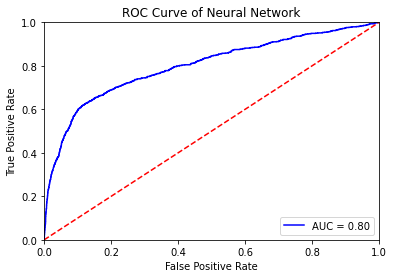

In [206]:
plot_roc_auc_curve(mlp_adam,X_test,y_test, y_test_pred_2)

/Users/alex/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass sample_weight=[0 0 1 ... 0 0 0] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


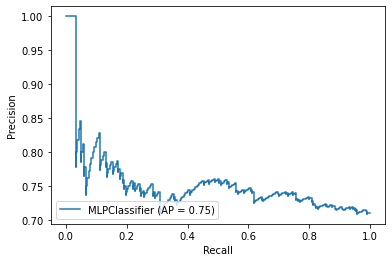

In [236]:
plot_precision_recall_curve(mlp_adam,X_test,y_test, y_test_pred_2)

In [210]:
report_scores(y_test, y_test_pred_2)

(0.3476848090982941,
 0.9025248846807478,
 0.7062706270627063,
 0.23060344827586207,
 0.6092141728383415,
 0.2495399642307451)

In [215]:
report_scores(y_train, y_train_pred_2)

(0.3542202016208737,
 0.9008497723823976,
 0.6651818856718634,
 0.2413793103448276,
 0.6129770893334371,
 0.24602396727561643)

In [222]:
report_adam = pd.DataFrame(columns=['Scores','Train','Validation','Test'])
report_adam['Scores'] = ['F1','Accuracy','Precision', 'Recall','AUC','Averaged_Precision']
report_adam['Test'] =(0.3476848090982941,
 0.9025248846807478,
 0.7062706270627063,
 0.23060344827586207,
 0.6092141728383415,
 0.2495399642307451)
report_adam['Train'] =(0.3542202016208737,
 0.9008497723823976,
 0.6651818856718634,
 0.2413793103448276,
 0.6129770893334371,
 0.24602396727561643)
report_adam['Validation'] =('nan',0.898786,'nan','nan',0.782767,0.234657)
report_adam

,Scores,Train,Validation,Test
0,F1,0.354220,nan,0.347685
1,Accuracy,0.900850,0.898786,0.902525
2,Precision,0.665182,nan,0.706271
3,Recall,0.241379,nan,0.230603
4,AUC,0.612977,0.782767,0.609214
5,Averaged_Precision,0.246024,0.234657,0.249540


### sgd

In [129]:
mlp_sgd=MLPClassifier(solver ="sgd",random_state=42,max_iter=1000)

scoring = {'AUC': 'roc_auc', 
           'Accuracy': make_scorer(accuracy_score),
           'Average_Precision':make_scorer(average_precision_score)
           }

param_grid ={
    'learning_rate':["constant","invscaling","adaptive"],
    'hidden_layer_sizes':[(1,5),(2,5),(3,5)],
    'alpha':[0.0,0.0001,0.001,0.01],
    'activation' :["logistic","relu","tanh"] }

CV_nnmodel = GridSearchCV(estimator=mlp_sgd,
                          param_grid=param_grid,
                          scoring = scoring,
                          return_train_score=True,
                          refit = 'AUC',
                          cv =3,
                          n_jobs=-1) 
       
CV_nnmodel.fit(X_train,y_train)

GridSearchCV(cv=3,
             estimator=MLPClassifier(max_iter=1000, random_state=42,
                                     solver='sgd'),
             n_jobs=-1,
             param_grid={'activation': ['logistic', 'relu', 'tanh'],
                         'alpha': [0.0, 0.0001, 0.001, 0.01],
                         'hidden_layer_sizes': [(1, 5), (2, 5), (3, 5)],
                         'learning_rate': ['constant', 'invscaling',
                                           'adaptive']},
             refit='AUC', return_train_score=True,
             scoring={'AUC': 'roc_auc', 'Accuracy': make_scorer(accuracy_score),
                      'Average_Precision': make_scorer(average_precision_score)})

In [225]:
parameters = CV_nnmodel.best_params_
parameters

{'activation': 'relu',
 'alpha': 0.001,
 'hidden_layer_sizes': (3, 5),
 'learning_rate': 'constant'}

In [226]:
scores =CV_nnmodel.best_score_
scores

0.7827670980051805

In [227]:
report2 = pd.DataFrame(CV_nnmodel.cv_results_)
report2[['param_learning_rate','param_hidden_layer_sizes','param_alpha','param_activation','mean_train_AUC','mean_test_AUC','mean_train_Accuracy','mean_test_Accuracy','mean_train_Average_Precision','mean_test_Average_Precision']]

,param_learning_rate,param_hidden_layer_sizes,param_alpha,param_activation,mean_train_AUC,mean_test_AUC,mean_train_Accuracy,mean_test_Accuracy,mean_train_Average_Precision,mean_test_Average_Precision
0,constant,"(1, 5)",0,logistic,0.773249,0.771836,0.891184,0.889287,0.157237,0.149720
1,invscaling,"(1, 5)",0,logistic,0.773249,0.771836,0.891184,0.889287,0.157237,0.149720
2,adaptive,"(1, 5)",0,logistic,0.773249,0.771836,0.891184,0.889287,0.157237,0.149720
3,constant,"(2, 5)",0,logistic,0.773164,0.771100,0.897527,0.896540,0.248612,0.245210
4,invscaling,"(2, 5)",0,logistic,0.773164,0.771100,0.897527,0.896540,0.248612,0.245210
...,...,...,...,...,...,...,...,...,...,...
103,invscaling,"(2, 5)",0.01,tanh,0.784445,0.781082,0.899848,0.897663,0.246625,0.235539
104,adaptive,"(2, 5)",0.01,tanh,0.784445,0.781082,0.899848,0.897663,0.246625,0.235539
105,constant,"(3, 5)",0.01,tanh,0.787808,0.774968,0.900592,0.898604,0.247034,0.236945
106,invscaling,"(3, 5)",0.01,tanh,0.787808,0.774968,0.900592,0.898604,0.247034,0.236945


In [228]:
report1[report1['mean_test_AUC'].isin([0.7827670980051805])][['mean_test_AUC','mean_test_Accuracy','mean_test_Average_Precision']]

,mean_test_AUC,mean_test_Accuracy,mean_test_Average_Precision
60,0.782767,0.898786,0.234657
61,0.782767,0.898786,0.234657
62,0.782767,0.898786,0.234657


In [229]:
# Test the Trained Model on Test Set
mlp_sgd=MLPClassifier(solver="sgd",
                      random_state=42,
                      activation = 'relu',
                      alpha = 0.01,
                      hidden_layer_sizes = (3,5),
                      learning_rate = 'constant')
mlp_sgd.fit(X_train,y_train)

MLPClassifier(alpha=0.01, hidden_layer_sizes=(3, 5), random_state=42,
              solver='sgd')

In [238]:
y_train_pred_3 = mlp_sgd.predict(X_train)
y_test_pred_3 = mlp_sgd.predict(X_test)

### Plot Sgd

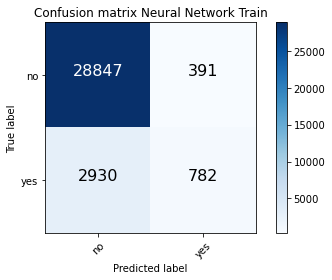

In [239]:
cmtr = confusion_matrix(y_train, y_train_pred_3)
np.set_printoptions(precision=2)
class_names = ['no', 'yes']
plt.figure()
plot_confusion_matrix(cmtr, classes=class_names,title='Confusion matrix Neural Network Train')

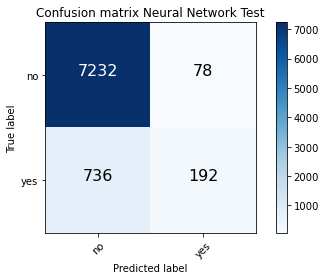

In [240]:
cmte = confusion_matrix(y_test, y_test_pred_3)
np.set_printoptions(precision=2)
class_names = ['no', 'yes']
plt.figure()
plot_confusion_matrix(cmte, classes=class_names,title='Confusion matrix Neural Network Test')

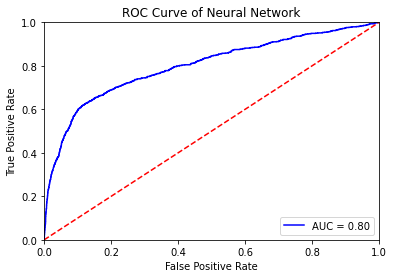

In [241]:
plot_roc_auc_curve(mlp_adam,X_test,y_test, y_test_pred_3)

/Users/alex/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass sample_weight=[0 0 0 ... 0 0 0] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


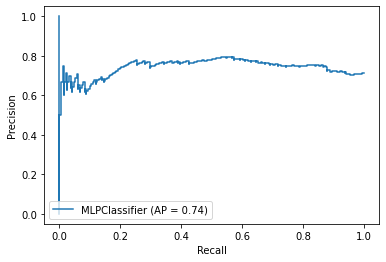

In [242]:
plot_precision_recall_curve(mlp_sgd,X_test,y_test, y_test_pred_3)

In [243]:
report_scores(y_test, y_test_pred_3)

(0.32053422370617696,
 0.9011896091284293,
 0.7111111111111111,
 0.20689655172413793,
 0.5981131185433275,
 0.2364685101003759)

In [245]:
report_scores(y_train, y_train_pred_3)

(0.3201637666325486,
 0.8992109256449166,
 0.6666666666666666,
 0.21066810344827586,
 0.5986475478593045,
 0.22936801231402507)

In [246]:
report_adam = pd.DataFrame(columns=['Scores','Train','Validation','Test'])
report_adam['Scores'] = ['F1','Accuracy','Precision', 'Recall','AUC','Averaged_Precision']
report_adam['Test'] =(0.32053422370617696,
 0.9011896091284293,
 0.7111111111111111,
 0.20689655172413793,
 0.5981131185433275,
 0.2364685101003759)
report_adam['Train'] =(0.3201637666325486,
 0.8992109256449166,
 0.6666666666666666,
 0.21066810344827586,
 0.5986475478593045,
 0.22936801231402507)
report_adam['Validation'] =('nan',0.898786,'nan','nan',0.782767,0.234657)
report_adam

,Scores,Train,Validation,Test
0,F1,0.320164,nan,0.320534
1,Accuracy,0.899211,0.898786,0.901190
2,Precision,0.666667,nan,0.711111
3,Recall,0.210668,nan,0.206897
4,AUC,0.598648,0.782767,0.598113
5,Averaged_Precision,0.229368,0.234657,0.236469
